In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

change_to_disk()
data_dir = Path("clean_split_1k/")
models_path = Path('Models/')
saves = Path('Trainning_results_saves/')

In [32]:
image_shape = (1920, 1080)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[1]), int(resize[0])]

data_transform = create_transform(resize=resize, rotate=180, color_dev=True, transf_tensor=True, normalize=False)

BATCH_SIZE = 32
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

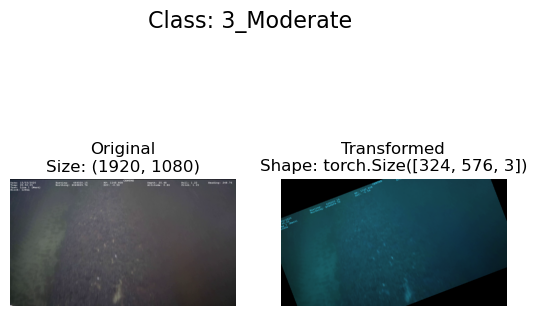

In [58]:
list_imgs = list(data_dir.glob("*/*/*.png"))

plot_transformed_images(image_paths=list_imgs,
                        transform=data_transform,
                        n=1,
                        seed=None)

In [42]:
NUM_EPOCHS = 2
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()

loss_fn = nn.CrossEntropyLoss()

In [43]:
#Train ResNet18
resnet18.to(device)
nadam_optim = torch.optim.NAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/2 [00:00<?, ?it/s]

Saving the model to: Models\model_2_epc.pth
Epoch: 1 | train_loss: 0.8978 | train_acc: 0.5845 | validation_loss: 1.3381 | validation_acc: 0.4715
Saving the model to: Models\model_2_epc.pth
Epoch: 2 | train_loss: 0.6510 | train_acc: 0.6960 | validation_loss: 0.6097 | validation_acc: 0.6770


In [44]:
train_resnet18_results

{'train_loss': [0.8977932662963867, 0.6510176765918732],
 'train_acc': [0.5845, 0.696],
 'validation_loss': [1.3380539044478255, 0.6097482634104381],
 'validation_acc': [0.471484375, 0.676953125]}